In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Error
$$\epsilon_{i}(P_j) = \frac{R_{E_i}(P_j)-R_{M_i}(P_j)}{R_{M_i}(P_j)}$$
### Root Mean Square
$$ X_{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} |x_n|^2} $$

In [59]:
def error(ap, rv):
    error = ((ap - rv) / rv) * 100
    mean = np.mean(np.abs(error))
    xrms = np.sqrt(np.mean(np.abs(error)**2))
    mean = round(mean, 3)
    xrms = round(xrms, 3)
    return mean, xrms

### El Alto

In [49]:
# RAOB
raob = pd.read_csv('TCWV/ElAlto/CCDF_RAOB.csv')
riwv = raob['IWV'].to_numpy()
ra20 = raob['A20'].to_numpy()
ra40 = raob['A40'].to_numpy()
ra50 = raob['A50'].to_numpy()
ra75 = raob['A75'].to_numpy()
# ERA5
era5 = pd.read_csv('TCWV/ElAlto/CCDF_ERA5.csv')
eiwv = era5['IWV'].to_numpy()
ea20 = era5['A20'].to_numpy()
ea40 = era5['A40'].to_numpy()
ea50 = era5['A50'].to_numpy()
ea75 = era5['A75'].to_numpy()
# ITU
itu = pd.read_csv('TCWV/ElAlto/CCDF_ITU.csv')
iiwv = itu['IWV'].to_numpy()
ia20 = itu['A20'].to_numpy()
ia40 = itu['A40'].to_numpy()
ia50 = itu['A50'].to_numpy()
ia75 = itu['A75'].to_numpy()
prob = itu['Probabilities'].to_numpy()

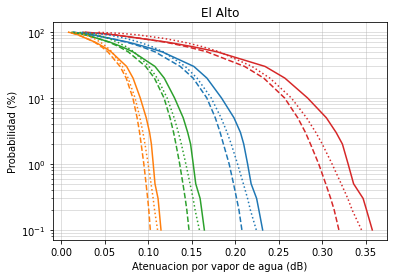

In [66]:
plt.grid(True, which="both", alpha=0.5)
#plt.xlim(0, 0.6)
plt.semilogy(ra20, prob, label='20 GHz: RAOBs')
plt.semilogy(ra40, prob, label='40 GHz: RAOBs')
plt.semilogy(ra50, prob, label='50 GHz: RAOBs')
plt.semilogy(ra75, prob, label='75 GHz: RAOBs')
plt.semilogy(ea20, prob, label='20 GHz: ERA5', ls='--', c='C0')
plt.semilogy(ea40, prob, label='40 GHz: ERA5', ls='--', c='C1')
plt.semilogy(ea50, prob, label='50 GHz: ERA5', ls='--', c='C2')
plt.semilogy(ea75, prob, label='75 GHz: ERA5', ls='--', c='C3')
plt.semilogy(ia20, prob, label='20 GHz: ITU', ls=':', c='C0')
plt.semilogy(ia40, prob, label='40 GHz: ITU', ls=':', c='C1')
plt.semilogy(ia50, prob, label='50 GHz: ITU', ls=':', c='C2')
plt.semilogy(ia75, prob, label='75 GHz: ITU', ls=':', c='C3')
#plt.legend(loc='best')
plt.title('El Alto')
plt.xlabel('Atenuacion por vapor de agua (dB)')
plt.ylabel('Probabilidad (%)')
plt.show()

In [57]:
# 20 GHz
emean, erms = error(ea20, ra20)
imean, irms = error(ia20, ra20)
print('20 GHz', emean, erms, imean, irms)
# 40 GHz
emean, erms = error(ea40, ra40)
imean, irms = error(ia40, ra40)
print('40 GHz', emean, erms, imean, irms)
# 50 GHz
emean, erms = error(ea50, ra50)
imean, irms = error(ia50, ra50)
print('50 GHz', emean, erms, imean, irms)
# 75 GHz
emean, erms = error(ea75, ra75)
imean, irms = error(ia75, ra75)
print('75 GHz', emean, erms, imean, irms)

20 GHz 8.198 8.738 16.116 25.118
40 GHz 8.295 8.898 14.647 21.825
50 GHz 8.376 9.015 14.358 21.205
75 GHz 8.374 9.022 14.297 21.07


|                 |   ERA5   |         |    ITU   |         |
|-----------------|:--------:|:-------:|:--------:|---------|
| Frequency (GHz) | Mean (%) | RMS (%) | Mean (%) | RMS (%) |
|        20       |   8.198  |  8.738  |  16.116  |  25.118 |
|        40       |   8.295  |  8.898  |  14.647  |  21.825 |
|        50       |   8.376  |  9.015  |  14.358  |  21.205 |
|        75       |   8.374  |  9.022  |  14.297  |  21.07  |